In [1]:
import pandas as pd
import numpy as np
import cv2
import glob
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
#鱼的类别标签
FishLabels = ['ALB', 'BET', 'DOL', 'LAG', 'NoF', 'OTHER', 'SHARK', 'YFT']

def load_label_img(filelist,label):
    list1 = []
    for file in filelist:
        img = cv2.imread(file, 0)
        img = cv2.resize(img, (32,32)).flatten()
        img = img/255
        img = np.insert(img, 0, label)
        list1.append(img)
    return list1
train_data_list = []
for index in range(len(FishLabels)):
    filelist = glob.glob("./train_split/%s/*.jpg" % FishLabels[index])
    lable_img = load_label_img(filelist,index)
    train_data_list.append(lable_img)

#joining real and animated data to prepare dataset
def join(l1, l2):
    l = np.concatenate((l1,l2))
    return l

train1 = join(train_data_list[0],train_data_list[1])
train2 = join(train_data_list[2],train_data_list[3])
train3 = join(train_data_list[4],train_data_list[5])
train4 = join(train_data_list[6],train_data_list[7])
train5 = join(train1,train2)
train6 = join(train3,train4)
train_data = join(train5,train6)
print(train_data,train_data.shape)

[[0.         0.29019608 0.69411765 ... 0.29019608 0.21960784 0.20784314]
 [0.         0.29019608 0.69411765 ... 0.29019608 0.39215686 0.27058824]
 [0.         0.61568627 0.60392157 ... 0.76470588 0.26666667 0.38431373]
 ...
 [7.         0.65098039 0.60784314 ... 0.51372549 0.46666667 0.39215686]
 [7.         0.2745098  0.21960784 ... 0.0627451  0.14509804 0.08235294]
 [7.         0.29019608 0.69411765 ... 0.19607843 0.23529412 0.2       ]] (3019, 1025)


In [3]:
test_data_list = []
for index in range(len(FishLabels)):
    filelist = glob.glob("./val_split/%s/*.jpg" % FishLabels[index])
    lable_img = load_label_img(filelist,index)
    test_data_list.append(lable_img)

test1 = join(test_data_list[0],test_data_list[1])
test2 = join(test_data_list[2],test_data_list[3])
test3 = join(test_data_list[4],test_data_list[5])
test4 = join(test_data_list[6],test_data_list[7])
test5 = join(test1,test2)
test6 = join(test3,test4)
test_data = join(test5,test6)
print(test_data,test_data.shape)


[[0.         0.9372549  0.98431373 ... 0.01960784 0.02352941 0.03921569]
 [0.         0.49411765 0.49411765 ... 0.15686275 0.16470588 0.15686275]
 [0.         0.29019608 0.69411765 ... 0.29411765 0.3254902  0.30980392]
 ...
 [7.         0.29019608 0.69411765 ... 0.07058824 0.05490196 0.03921569]
 [7.         0.29019608 0.69411765 ... 0.08235294 0.06666667 0.05882353]
 [7.         0.29019608 0.69411765 ... 0.12941176 0.11372549 0.10980392]] (758, 1025)


In [4]:
#删除横轴上第一列，获取训练集
X_train = np.delete(train_data, 0, axis=1)
# 获取第一列得到标签集
y_train = train_data[:,0]
print(X_train)
print(y_train)

[[0.29019608 0.69411765 0.23921569 ... 0.29019608 0.21960784 0.20784314]
 [0.29019608 0.69411765 0.23921569 ... 0.29019608 0.39215686 0.27058824]
 [0.61568627 0.60392157 0.23921569 ... 0.76470588 0.26666667 0.38431373]
 ...
 [0.65098039 0.60784314 0.64705882 ... 0.51372549 0.46666667 0.39215686]
 [0.2745098  0.21960784 0.32156863 ... 0.0627451  0.14509804 0.08235294]
 [0.29019608 0.69411765 0.23921569 ... 0.19607843 0.23529412 0.2       ]]
[0. 0. 0. ... 7. 7. 7.]


In [5]:
X_val = np.delete(test_data,0,axis=1)
y_val = test_data[:,0]
print(X_val)
print(y_val)

[[0.9372549  0.98431373 1.         ... 0.01960784 0.02352941 0.03921569]
 [0.49411765 0.49411765 0.50588235 ... 0.15686275 0.16470588 0.15686275]
 [0.29019608 0.69411765 0.23921569 ... 0.29411765 0.3254902  0.30980392]
 ...
 [0.29019608 0.69411765 0.23921569 ... 0.07058824 0.05490196 0.03921569]
 [0.29019608 0.69411765 0.23921569 ... 0.08235294 0.06666667 0.05882353]
 [0.29019608 0.69411765 0.23921569 ... 0.12941176 0.11372549 0.10980392]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [6]:
from sklearn.grid_search import GridSearchCV  
from sklearn import cross_validation, metrics  
#不管任何参数，都用默认的，拟合下数据看看  
rf0 = RandomForestClassifier(oob_score=True, random_state=10)  
rf0.fit(X_train,y_train)  
print(rf0.oob_score_)  
y_predprob = rf0.predict_proba(X_train)[:,1]  
print(y_predprob)  

d:\program files\python35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
d:\program files\python35\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.8433256045048029
[0. 0. 0. ... 0. 0. 0.]


d:\program files\python35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
d:\program files\python35\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


#### 验证集预测

acc: 0.9195250659630607
f1: 0.9181585848879672
auc: 0.9421546032488282


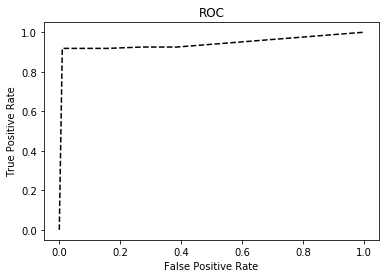

In [29]:
pred  = rf0.predict(X_val)
acc = accuracy_score(y_val,pred)
from sklearn.metrics import f1_score
f1 = f1_score(y_val,pred,average='weighted')
fpr, tpr, thresholds = metrics.roc_curve(y_val, pred, pos_label=7)
auc = metrics.auc(fpr, tpr)
print("acc:",acc)
print('f1:',f1)
print('auc:',auc)
#画ROC曲线  
plt.plot(fpr,tpr, 'k--')  
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.title('ROC')   
plt.show()  

In [8]:
#预测图片
img_path = "./train/YFT/img_00004.jpg"
img = cv2.imread(img_path, 0)
img = cv2.resize(img, (32,32)).flatten()
img = img/255
li = []
li.append(img)
pred2  = rf0.predict(li)
print(FishLabels[int(pred2)])

YFT


In [9]:
# # Plot the results
# plt.figure()

# plt.plot(X_val, pred, color="yellowgreen", label="max_depth=5", linewidth=2)
# plt.xlabel("data")
# plt.ylabel("target")